In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import load_wine

# Fix the random seed for reproducibility
# !! Important !! : do not change this
seed = 1234
np.random.seed(seed)

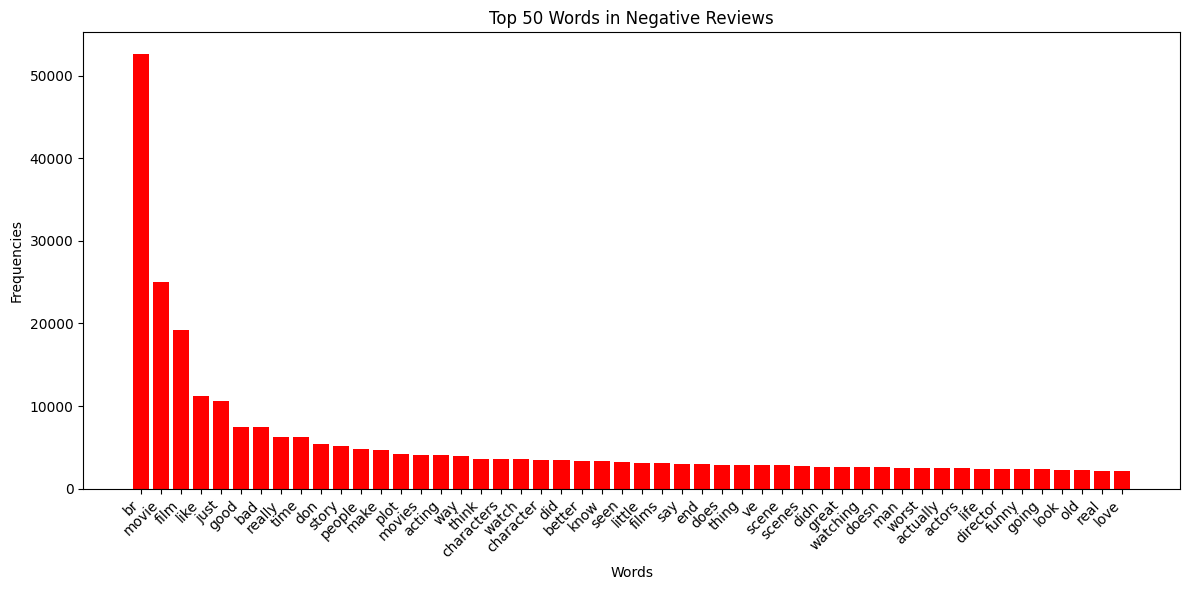

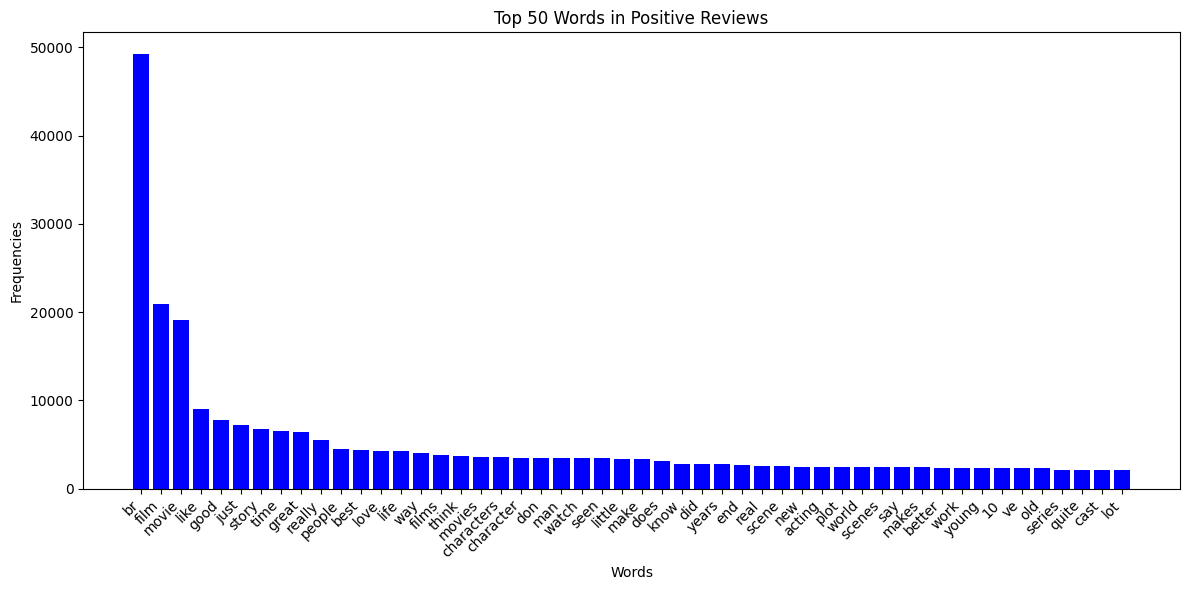

In [2]:
import os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

# Directories
pos_dir = 'data/aclImdb/train/pos'[:1000]
neg_dir = 'data/aclImdb/train/neg'[:1000]

test_pos_dir = 'data/aclImdb/test/pos'[:1000]
test_neg_dir = 'data/aclImdb/test/neg'[:1000]

def load_texts(folder_path):
    texts = []
    for filename in os.listdir(folder_path):
        filepath = os.path.join(folder_path, filename)
        with open(filepath, 'r', encoding='utf-8') as f:
            texts.append(f.read())
    return texts

# Load data
pos_texts = load_texts(pos_dir)
neg_texts = load_texts(neg_dir)

test_post_texts = load_texts(test_pos_dir)
test_neg_texts = load_texts(test_neg_dir)

vectorizer = CountVectorizer(stop_words='english', lowercase=True)

X_pos = vectorizer.fit_transform(pos_texts)
vocab_pos = vectorizer.get_feature_names_out()
counts_pos = X_pos.toarray().sum(axis=0)
freq_pos = list(zip(vocab_pos, counts_pos))

X_neg = vectorizer.fit_transform(neg_texts)
vocab_neg = vectorizer.get_feature_names_out()
counts_neg = X_neg.toarray().sum(axis=0)
freq_neg = list(zip(vocab_neg, counts_neg))

top_pos = Counter(dict(freq_pos)).most_common(50)
top_neg = Counter(dict(freq_neg)).most_common(50)

def plot_top_words(data, title, color):
    words, counts = zip(*data)
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts, color=color)
    plt.xticks(rotation=45, ha='right')
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequencies')
    plt.tight_layout()
    plt.show()

plot_top_words(top_neg, 'Top 50 Words in Negative Reviews', 'red')
plot_top_words(top_pos, 'Top 50 Words in Positive Reviews', 'blue')

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

# Combine texts and labels
X_train_texts = pos_texts + neg_texts
y_train_labels = [1] * len(pos_texts) + [0] * len(neg_texts)

# Vectorize the full dataset
vectorizer = CountVectorizer(stop_words='english', lowercase=True)
X = vectorizer.fit_transform(X_train_texts)

#Split just the training dataset into 70% training and 30% validation
X_train, X_val, y_train, y_val = train_test_split(X, y_train_labels, test_size=0.3, random_state=seed)

X_test_texts = test_post_texts + test_neg_texts
y_test_labels = [1] * len(test_post_texts) + [0] * len(test_neg_texts)

#Full Testing Dataset
X = vectorizer.transform(X_test_texts)
X_test = X
y_test = y_test_labels

print('Number of training examples:', X_train.shape[0])
print('Number of validation examples:', X_val.shape[0])
print('Number of testing examples:', X_test.shape[0])
print('Vocabulary size:', X_train.shape[1])

# Create and train the SVM classifier
svm_classifier = LinearSVC()
print('\nTraining SVM model with', X_train.shape[0], 'examples.....')
svm_classifier.fit(X_train, y_train)

# Evaluate on training set
svm_train_predictions = svm_classifier.predict(X_train)
svm_train_accuracy = accuracy_score(y_train, svm_train_predictions)
print('\nSVM Training accuracy:', format(100 * svm_train_accuracy, '.2f'))

# Evaluate on validation set
svm_val_predictions = svm_classifier.predict(X_val)
svm_val_accuracy = accuracy_score(y_val, svm_val_predictions)
print('SVM Validation accuracy:', format(100 * svm_val_accuracy, '.2f'))

# Try smaller C values like 0.1, 0.01
svm = LinearSVC(C=0.1)
print('\nTraining SVM model with C=0.1...')
svm.fit(X_train, y_train)

svm_train_acc = accuracy_score(y_train, svm.predict(X_train))
svm_val_acc = accuracy_score(y_val, svm.predict(X_val))
print('SVM Training Accuracy:', format(100 * svm_train_acc, '.2f'))
print('SVM Validation Accuracy:', format(100 * svm_val_acc, '.2f'))


Number of training examples: 17500
Number of validation examples: 7500
Number of testing examples: 25000
Vocabulary size: 74538

Training SVM model with 17500 examples.....

SVM Training accuracy: 100.00
SVM Validation accuracy: 85.39

Training SVM model with C=0.1...
SVM Training Accuracy: 99.94
SVM Validation Accuracy: 86.28


In [ ]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import accuracy_score


# alphas = [0.0005, 0.001 , 0.005, 0.01, 0.05]
# solvers = ['lbfgs', 'sgd', 'adam']
# activations = ['identity', 'logistic', 'tanh', 'relu']
# learning_rates = ["invscaling", "adaptive"]
# max_iters = [500, 1000, 1500, 2000]


# for max_iter in max_iters:
#     hyperparameters = {
#         'hidden_layer_sizes': (8, ),
#         'learning_rate_init': 0.001,
#         'solver': 'sgd',
#         'activation': 'logistic',
#         'learning_rate': 'constant',
#         'alpha': 0.05,
#         'max_iter': max_iter,
#         'early_stopping': True,
#         'random_state': seed
#     }

#     mlp = MLPClassifier(**hyperparameters)
#     mlp.fit(X_train, y_train)

#     train_predictions = mlp.predict(X_train)
#     train_accuracy = accuracy_score(y_train, train_predictions)
#     print('\nTraining accuracy:', format(100 * train_accuracy, '.2f'))

#     test_predictions = mlp.predict(X_test)
#     test_accuracy = accuracy_score(y_test, test_predictions)
#     print('Testing accuracy:', format(100 * test_accuracy, '.2f'))


Training accuracy: 89.85
Testing accuracy: 85.95

Training accuracy: 89.85
Testing accuracy: 85.95

Training accuracy: 89.85
Testing accuracy: 85.95

Training accuracy: 89.85
Testing accuracy: 85.95
